In [ ]:
!pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## HyperOpt 사용법 익히기

1. 검색 공간 설정
2. 목적 함수 절정
3. fmin() 함수를 통해 베이지안 최적화 기법에 기반한 최적의 입력 값 찾기

- **검색 공간** 설정
- hp 모듈로 입력 변수 및 검색 범위 설정

In [ ]:
## hp 모듈을 사용하여 입력 변수명 및 검색 공간 설정
from hyperopt import hp

search_space = {'x':hp.quniform('x', -10, 10, 1), ## dictionary 형태
                'y':hp.quniform('y', -15, 15, 1)}

- **목적 함수** 생성

In [ ]:
from hyperopt import STATUS_OK

## 목적 함수 생성
## 변수, 검색 공간을 입력으로 받고, 특정 값을 반환하는 구조
def objective_func(search_space):
  
  x = search_space['x']
  y = search_space['y']
  retval = x ** 2 - 20 * y

  return retval

- 목적 함수의 반환 값이 최소가 될 수 있는 최적의 입력 값을 베이지안 최적화 기법에 기반하여 찾아야 함
- HyperOpt는 이러한 기능을 `fmin()` 함수를 통해 제공함

In [ ]:
from hyperopt import fmin, tpe, Trials
import numpy as np

## 입력 결과를 저장할 객체 생성
trial_val = Trials()

## 목적 함수의 최솟값을 반환하는 최적 입력 변수를 5번 시도로 찾아냄
## fmin() 함수는 아래의 주요 인자를 가짐
best_01 = fmin(fn=objective_func,    ## 목적 함수
               space=search_space,   ## 검색 공간
               algo=tpe.suggest,     ## 베이지안 최적화 적용 알고리즘
               max_evals=5,          ## 입력 시도 횟수
               trials=trial_val,     ## 시도한 입력 값 및 입력 결과 저장
               #rstate=np.random.default_rng(seed=0)   ## fmin()을 시도할 때마다 동일한 결과를 가질 수 있도록 설정하는 랜덤 시드
               )

100%|██████████| 5/5 [00:00<00:00, 313.89it/s, best loss: -271.0]


In [ ]:
print('best:', best_01)

best: {'x': 3.0, 'y': 14.0}


In [ ]:
from hyperopt import fmin, tpe, Trials
import numpy as np

## 입력 결과를 저장할 객체 생성
trial_val = Trials()

## 목적 함수의 최솟값을 반환하는 최적 입력 변수를 5번 시도로 찾아냄
## fmin() 함수는 아래의 주요 인자를 가짐
best_02 = fmin(fn=objective_func,    ## 목적 함수
               space=search_space,   ## 검색 공간
               algo=tpe.suggest,     ## 베이지안 최적화 적용 알고리즘
               max_evals=20,         ## 입력 시도 횟수
               trials=trial_val,     ## 시도한 입력 값 및 입력 결과 저장
               #rstate=np.random.default_rng(seed=0)   ## fmin()을 시도할 때마다 동일한 결과를 가질 수 있도록 설정하는 랜덤 시드
               )

100%|██████████| 20/20 [00:00<00:00, 595.91it/s, best loss: -259.0]


In [ ]:
print('best:', best_02)

best: {'x': -1.0, 'y': 13.0}


- trial_val의 results 및 vals 확인

In [ ]:
trial_val.results

[{'loss': 161.0, 'status': 'ok'},
 {'loss': -251.0, 'status': 'ok'},
 {'loss': -259.0, 'status': 'ok'},
 {'loss': -215.0, 'status': 'ok'},
 {'loss': -95.0, 'status': 'ok'},
 {'loss': -180.0, 'status': 'ok'},
 {'loss': 241.0, 'status': 'ok'},
 {'loss': -180.0, 'status': 'ok'},
 {'loss': 305.0, 'status': 'ok'},
 {'loss': -171.0, 'status': 'ok'},
 {'loss': 105.0, 'status': 'ok'},
 {'loss': 209.0, 'status': 'ok'},
 {'loss': 9.0, 'status': 'ok'},
 {'loss': 164.0, 'status': 'ok'},
 {'loss': -124.0, 'status': 'ok'},
 {'loss': 21.0, 'status': 'ok'},
 {'loss': 284.0, 'status': 'ok'},
 {'loss': -31.0, 'status': 'ok'},
 {'loss': 241.0, 'status': 'ok'},
 {'loss': 261.0, 'status': 'ok'}]

In [ ]:
trial_val.vals

{'x': [9.0,
  -3.0,
  -1.0,
  -5.0,
  5.0,
  -10.0,
  -1.0,
  -0.0,
  -5.0,
  3.0,
  -5.0,
  -7.0,
  7.0,
  -8.0,
  -4.0,
  9.0,
  -8.0,
  -7.0,
  1.0,
  1.0],
 'y': [-4.0,
  13.0,
  13.0,
  12.0,
  6.0,
  14.0,
  -12.0,
  9.0,
  -14.0,
  9.0,
  -4.0,
  -8.0,
  2.0,
  -5.0,
  7.0,
  3.0,
  -11.0,
  4.0,
  -12.0,
  -13.0]}

In [ ]:
## trial_val을 dataframe 형태로 변환하여 확인
import pandas as pd

losses = [loss_dict['loss'] for loss_dict in trial_val.results]

result_df = pd.DataFrame(
    {
        'x':trial_val.vals['x'],
        'y':trial_val.vals['y'],
        'losses':losses
     }
)

result_df.head(5)

,x,y,losses
0,9.0,-4.0,161.0
1,-3.0,13.0,-251.0
2,-1.0,13.0,-259.0
3,-5.0,12.0,-215.0
4,5.0,6.0,-95.0


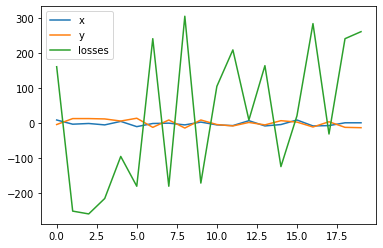

In [ ]:
result_df.plot()

## HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화

- HyperOpt 사용 시 주의사항

  - HyperOpt는 입력 값과 반환 값이 모두 실수형이기 때문에 정수형 하이퍼 파라미터 입력 시 형변환 필요
  - HyperOpt는 목적 함수의 최솟값을 반환할 수 있도록 최적화하는 것이기 때문에 성능 값이 클수록 좋은 성능 지표일 경우 -1을 곱해주어야 함

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

- Data

In [3]:
## 유방암 데이터셋 로드
dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

In [4]:
## 데이터를 Pandas DataFrame으로 로드
cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
## 학습 및 검증 데이터셋으로 데이터 분리
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

In [6]:
## 학습, 검증용 데이터셋 비율 8 : 2
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

## X_train, y_train을 다시 9 : 1 비율로 분리
## => XGBoost가 제공하는 교차 검증 성능 평가 및 조기 중단을 수행하기 위함
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

In [7]:
## 모델 성능 평가 함수 선언
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):

    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

- HyperOpt

In [11]:
## 1. 검색 공간 설정

from hyperopt import hp

xgb_search_space = {
    'max_depth':hp.quniform('max_depth', 5, 20, 1),                     ## 정수형 하이퍼 파라미터 => quniform 사용
    'min_child_weight':hp.quniform('min_child_weight', 1, 2, 1),        ## 정수형 하이퍼 파라미터 => quniform 사용
    'learning_rate':hp.uniform('learning_rate', 0.01, 0.2),
    'colsample_bytree':hp.uniform('colsample_bytree', 0.5, 1),
}

In [12]:
## 2. 목적 함수 설정
## 검색 공간에서 설정한 하이퍼 파라미터들을 입력 받아서 XGBoost를 학습시키고, 평가 지표를 반환하도록 구성되어야 함

from sklearn.model_selection import cross_val_score  ## 교차 검증
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

def objective_func(search_space):

  xgb_clf = XGBClassifier(
      n_estimators=100,
      max_depth=int(search_space['max_depth']),                ## int형으로 형변환 필요
      min_child_weight=int(search_space['min_child_weight']),  ## int형으로 형변환 필요
      learning_rate=search_space['learning_rate'], 
      colsample_bytree=search_space['colsample_bytree'],
      eval_metric='logloss'
  )

  accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)  ## 3개의 교차 검증 세트로 정확도 반환

  ## acc는 cv=3 개수만큼의 결과를 리스트로 가짐, 이를 평균하여 반환하되, -1을 곱함
  return {
      'loss':(-1) * np.mean(accuracy),
      'status':STATUS_OK
  }

In [13]:
## 3. fmin()을 사용하여 최적 하이퍼 파라미터 찾기

from hyperopt import fmin, tpe, Trials

trial_val = Trials() ## 결과 저장

best = fmin(
    fn=objective_func,
    space=xgb_search_space,
    algo=tpe.suggest,
    max_evals=50,    ## 최대 반복 횟수 지정
    trials=trial_val,
)

100%|██████████| 50/50 [00:10<00:00,  4.88it/s, best loss: -0.9670616939700244]


In [14]:
best ## 정수형 하이퍼 파라미터 값이 뒤에 .0이 붙어서 실수형으로 반환됨을 유의하기!

{'colsample_bytree': 0.7318580056440538,
 'learning_rate': 0.17023567693561695,
 'max_depth': 8.0,
 'min_child_weight': 2.0}

- Model

In [15]:
## 획득한 최적의 하이퍼 파라미터를 이용하여 모델 선언

xgb_wrapper = XGBClassifier(
    n_estimators=400,
    learning_rate=round(best['learning_rate'], 5),
    max_depth=int(best['max_depth']),
    min_child_weight=int(best['min_child_weight']),
    colsample_bytree=round(best['colsample_bytree'], 5)
)

- Train

In [16]:
## early stopping

evals = [(X_tr, y_tr), (X_val, y_val)]

## model train

xgb_wrapper.fit(
    X_tr, y_tr,
    early_stopping_rounds=50,
    eval_metric='logloss',
    eval_set=evals,
    verbose=True
)

[0]	validation_0-logloss:0.559868	validation_1-logloss:0.615451
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 50 rounds.
[1]	validation_0-logloss:0.461279	validation_1-logloss:0.553537
[2]	validation_0-logloss:0.385631	validation_1-logloss:0.494076
[3]	validation_0-logloss:0.3287	validation_1-logloss:0.463087
[4]	validation_0-logloss:0.279723	validation_1-logloss:0.422393
[5]	validation_0-logloss:0.240534	validation_1-logloss:0.394163
[6]	validation_0-logloss:0.20928	validation_1-logloss:0.367481
[7]	validation_0-logloss:0.184117	validation_1-logloss:0.346697
[8]	validation_0-logloss:0.16196	validation_1-logloss:0.329961
[9]	validation_0-logloss:0.14458	validation_1-logloss:0.314714
[10]	validation_0-logloss:0.127811	validation_1-logloss:0.298463
[11]	validation_0-logloss:0.112422	validation_1-logloss:0.288095
[12]	validation_0-logloss:0.101831	validation_1-logloss:0.283579
[13]	

XGBClassifier(colsample_bytree=0.73186, learning_rate=0.17024, max_depth=8,
              min_child_weight=2, n_estimators=400)

- Eval

In [17]:
## eval

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[33  4]
 [ 2 75]]
정확도: 0.9474, 정밀도: 0.9494, 재현율: 0.9740, F1: 0.9615, AUC: 0.9933
